In [16]:
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud
from IPython.display import Image
import datetime as dt
import re
import seaborn as sns
import matplotlib.pyplot as plt
import csv
import sqlite3
import joblib
from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten, LSTM
from keras.layers import GlobalMaxPooling1D
from keras.models import Model
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.layers import Input
from keras.layers.merge import Concatenate
import warnings
warnings.filterwarnings("ignore")

In [17]:
df = pd.read_csv('./output/main_data.csv')
df.rename(columns = {'O*NET-SOC Code':'id','Title':'title','Element Name':'tags','Domain Source':'domain','Description':'description'}, inplace = True)
df.drop_duplicates()
print(df.shape)
df.head(10)

(38720, 5)


,id,title,tags,domain,description
0,11-1011.00,Chief Executives,Structured versus Unstructured Work,Incumbent,Determine and formulate policies and provide o...
1,11-1011.00,Chief Executives,Initiative,Incumbent,Determine and formulate policies and provide o...
2,11-1011.00,Chief Executives,Letters and Memos,Incumbent,Determine and formulate policies and provide o...
3,11-1011.00,Chief Executives,Time Pressure,Incumbent,Determine and formulate policies and provide o...
4,11-1011.00,Chief Executives,Arm-Hand Steadiness,Analyst,Determine and formulate policies and provide o...
5,11-1011.00,Chief Executives,Very Hot or Cold Temperatures,Incumbent,Determine and formulate policies and provide o...
6,11-1011.00,Chief Executives,Work Schedules,Incumbent,Determine and formulate policies and provide o...
7,11-1011.00,Chief Executives,Critical Thinking,Analyst,Determine and formulate policies and provide o...
8,11-1011.00,Chief Executives,Responsible for Others' Health and Safety,Incumbent,Determine and formulate policies and provide o...
9,11-1011.00,Chief Executives,Extent Flexibility,Analyst,Determine and formulate policies and provide o...


In [18]:
print(len(df.tags.unique()))

6177


In [19]:
df["tags"].value_counts().reset_index()

,index,tags
0,Word processing software,187
1,Spreadsheet software,185
2,Microsoft Excel,173
3,Microsoft Word,170
4,Data base user interface and query software,161
...,...,...
6172,Linoleum rollers,1
6173,Video analysis software,1
6174,Lenox Softworks VideoPoint,1
6175,Grinding spindles,1


In [20]:
df.groupby('description')['tags'].count().reset_index()

,description,tags
0,"Accommodate hotel, motel, and resort patrons b...",40
1,Act as oversight and security agent for manage...,40
2,"Address organizational sustainability issues, ...",40
3,"Adjust and operate surveying instruments, such...",40
4,"Administer anesthesia, monitor patient's vital...",40
...,...,...
963,Work in nursery facilities or at customer loca...,40
964,"Work in slaughtering, meat packing, or wholesa...",40
965,Write advertising copy for use by publication ...,40
966,Write and transcribe musical scores.,40


In [21]:
df.groupby('title')['tags'].count().reset_index()

,title,tags
0,Accountants,40
1,Actors,40
2,Actuaries,40
3,Acupuncturists,40
4,Acute Care Nurses,40
...,...,...
963,Wind Energy Project Managers,40
964,Wind Turbine Service Technicians,40
965,"Woodworking Machine Setters, Operators, and Te...",40
966,Word Processors and Typists,40


In [22]:
df.groupby('domain')['tags'].count().reset_index()

,domain,tags
0,Analyst,20174
1,Incumbent,14219
2,Legacy Analyst,40
3,Occupational Expert,4287


In [23]:
#Convert string to Lower Case
df['title'] = df['title'].str.lower()
df['description'] = df['description'].str.lower()
df['tags'] = df['tags'].str.lower()
df['domain'] = df['domain'].str.lower()

df.head(10)

,id,title,tags,domain,description
0,11-1011.00,chief executives,structured versus unstructured work,incumbent,determine and formulate policies and provide o...
1,11-1011.00,chief executives,initiative,incumbent,determine and formulate policies and provide o...
2,11-1011.00,chief executives,letters and memos,incumbent,determine and formulate policies and provide o...
3,11-1011.00,chief executives,time pressure,incumbent,determine and formulate policies and provide o...
4,11-1011.00,chief executives,arm-hand steadiness,analyst,determine and formulate policies and provide o...
5,11-1011.00,chief executives,very hot or cold temperatures,incumbent,determine and formulate policies and provide o...
6,11-1011.00,chief executives,work schedules,incumbent,determine and formulate policies and provide o...
7,11-1011.00,chief executives,critical thinking,analyst,determine and formulate policies and provide o...
8,11-1011.00,chief executives,responsible for others' health and safety,incumbent,determine and formulate policies and provide o...
9,11-1011.00,chief executives,extent flexibility,analyst,determine and formulate policies and provide o...


In [24]:
#Remove @ and # and Unwanted Symbols
import re
import string
from string import digits
import warnings
warnings.filterwarnings("ignore")
PUNCT_TO_REMOVE = string.punctuation
            
df['description'] = df['description'].str.replace('[^\w\s]',' ')
df['tags'] = df['tags'].str.replace('[^\w\s]',' ')

df.head(10)

,id,title,tags,domain,description
0,11-1011.00,chief executives,structured versus unstructured work,incumbent,determine and formulate policies and provide o...
1,11-1011.00,chief executives,initiative,incumbent,determine and formulate policies and provide o...
2,11-1011.00,chief executives,letters and memos,incumbent,determine and formulate policies and provide o...
3,11-1011.00,chief executives,time pressure,incumbent,determine and formulate policies and provide o...
4,11-1011.00,chief executives,arm hand steadiness,analyst,determine and formulate policies and provide o...
5,11-1011.00,chief executives,very hot or cold temperatures,incumbent,determine and formulate policies and provide o...
6,11-1011.00,chief executives,work schedules,incumbent,determine and formulate policies and provide o...
7,11-1011.00,chief executives,critical thinking,analyst,determine and formulate policies and provide o...
8,11-1011.00,chief executives,responsible for others health and safety,incumbent,determine and formulate policies and provide o...
9,11-1011.00,chief executives,extent flexibility,analyst,determine and formulate policies and provide o...


In [25]:
#Remove Digits
import re
import string
from string import digits
import warnings
warnings.filterwarnings("ignore")
PUNCT_TO_REMOVE = string.punctuation

def remove_digits(text):
    """custom function to remove the punctuation"""
    remove_digits = str.maketrans('', '', digits) 
    res = text.translate(remove_digits) 
    return res

df['description'] = df['description'].apply(lambda text: remove_digits(text))
df['tags'] = df['tags'].apply(lambda text: remove_digits(text))

df.head(10)

,id,title,tags,domain,description
0,11-1011.00,chief executives,structured versus unstructured work,incumbent,determine and formulate policies and provide o...
1,11-1011.00,chief executives,initiative,incumbent,determine and formulate policies and provide o...
2,11-1011.00,chief executives,letters and memos,incumbent,determine and formulate policies and provide o...
3,11-1011.00,chief executives,time pressure,incumbent,determine and formulate policies and provide o...
4,11-1011.00,chief executives,arm hand steadiness,analyst,determine and formulate policies and provide o...
5,11-1011.00,chief executives,very hot or cold temperatures,incumbent,determine and formulate policies and provide o...
6,11-1011.00,chief executives,work schedules,incumbent,determine and formulate policies and provide o...
7,11-1011.00,chief executives,critical thinking,analyst,determine and formulate policies and provide o...
8,11-1011.00,chief executives,responsible for others health and safety,incumbent,determine and formulate policies and provide o...
9,11-1011.00,chief executives,extent flexibility,analyst,determine and formulate policies and provide o...


In [26]:
#Remove Punctuations
import string
PUNCT_TO_REMOVE = string.punctuation
PUNCT_TO_REMOVE.replace('-','')
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans(' ', ' ', PUNCT_TO_REMOVE))

df['description'] = df['description'].apply(lambda text: remove_punctuation(text))
df['tags'] = df['tags'].apply(lambda text: remove_punctuation(text))

HYPH = '-'
def remove_hyphen(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans(' ', ' ', HYPH))

df['description'] = df['description'].apply(lambda text: remove_hyphen(text))
df['tags'] = df['tags'].apply(lambda text: remove_hyphen(text))

df.head(10)

,id,title,tags,domain,description
0,11-1011.00,chief executives,structured versus unstructured work,incumbent,determine and formulate policies and provide o...
1,11-1011.00,chief executives,initiative,incumbent,determine and formulate policies and provide o...
2,11-1011.00,chief executives,letters and memos,incumbent,determine and formulate policies and provide o...
3,11-1011.00,chief executives,time pressure,incumbent,determine and formulate policies and provide o...
4,11-1011.00,chief executives,arm hand steadiness,analyst,determine and formulate policies and provide o...
5,11-1011.00,chief executives,very hot or cold temperatures,incumbent,determine and formulate policies and provide o...
6,11-1011.00,chief executives,work schedules,incumbent,determine and formulate policies and provide o...
7,11-1011.00,chief executives,critical thinking,analyst,determine and formulate policies and provide o...
8,11-1011.00,chief executives,responsible for others health and safety,incumbent,determine and formulate policies and provide o...
9,11-1011.00,chief executives,extent flexibility,analyst,determine and formulate policies and provide o...


In [27]:
#StopWords removal
import nltk

nltk.download('stopwords')
from nltk.corpus import stopwords
", ".join(stopwords.words('english'))
STOPWORDS = set(stopwords.words('english'))
print((STOPWORDS))
STOPWORDS.remove('not')
STOPWORDS.remove('nor')

def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

df['description'] = df['description'].apply(lambda text: remove_stopwords(text))
df['tags'] = df['tags'].apply(lambda text: remove_stopwords(text))
df.head(10)

{'only', 'out', 'does', "needn't", 'himself', 'itself', 'o', 'no', "it's", 'shan', "weren't", 'her', 't', 'same', 'and', 'yourselves', 'once', 'their', 'some', 'will', "mightn't", 'how', 'should', 'too', 'or', 'his', 'wouldn', 'these', 'theirs', 'because', 'aren', 'you', "couldn't", "you're", 've', 'be', 'yours', 'that', 'having', 'was', 'are', 'hasn', "hasn't", "you'll", 'in', 'into', 'ourselves', 'below', 'more', "you'd", "wasn't", 'down', 'ain', 'off', "mustn't", 'couldn', "doesn't", 'myself', 'which', 'do', 'while', 'for', 'than', 'with', 'up', 're', 'when', 'through', 'haven', 'm', 'we', 'is', "she's", 'such', 'your', 'them', 'can', 'few', 'over', 'the', "aren't", 'being', 'did', 'again', "you've", 'hadn', 'at', 'hers', 'against', 'i', 'she', 'an', 'am', 'those', 'ours', 'its', 'this', "wouldn't", "don't", 'own', 'very', 'didn', 'to', 'as', 'were', 'but', 'there', 'just', 'now', 'had', 'themselves', 'nor', 'isn', "won't", "isn't", 'shouldn', "that'll", 'who', 'before', 'during', '

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ram_lucky/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,id,title,tags,domain,description
0,11-1011.00,chief executives,structured versus unstructured work,incumbent,determine formulate policies provide overall d...
1,11-1011.00,chief executives,initiative,incumbent,determine formulate policies provide overall d...
2,11-1011.00,chief executives,letters memos,incumbent,determine formulate policies provide overall d...
3,11-1011.00,chief executives,time pressure,incumbent,determine formulate policies provide overall d...
4,11-1011.00,chief executives,arm hand steadiness,analyst,determine formulate policies provide overall d...
5,11-1011.00,chief executives,hot cold temperatures,incumbent,determine formulate policies provide overall d...
6,11-1011.00,chief executives,work schedules,incumbent,determine formulate policies provide overall d...
7,11-1011.00,chief executives,critical thinking,analyst,determine formulate policies provide overall d...
8,11-1011.00,chief executives,responsible others health safety,incumbent,determine formulate policies provide overall d...
9,11-1011.00,chief executives,extent flexibility,analyst,determine formulate policies provide overall d...


In [28]:
data = df.copy()
new = data.groupby('id').agg(lambda x : ' '.join(set(x))).reset_index()
new['tags'] = new['tags'].str.split()
new['domain'] = new['domain'].str.split()
new['description'] = np.array(new['description'].str.split())
new.to_csv('./output/new_preprocessed_data.csv',header=True,index=False,encoding="utf-8") 
new.head()

,id,title,tags,domain,description
0,11-1011.00,chief executives,"[extent, flexibility, structured, versus, unst...","[analyst, incumbent]","[determine, formulate, policies, provide, over..."
1,11-1011.03,chief sustainability officers,"[extent, flexibility, contact, others, importa...","[occupational, expert, analyst]","[communicate, coordinate, management, sharehol..."
2,11-1021.00,general and operations managers,"[google, drive, lexisnexis, heat, software, go...","[analyst, incumbent]","[plan, direct, coordinate, operations, public,..."
3,11-2011.00,advertising and promotions managers,"[youtube, business, intelligence, data, analys...","[analyst, incumbent]","[plan, direct, coordinate, advertising, polici..."
4,11-2021.00,marketing managers,"[youtube, microsoft, sql, server, sas, microso...","[analyst, incumbent]","[plan, direct, coordinate, marketing, policies..."


In [29]:
start = datetime.now()
df["tag_count"] = df["tags"].apply(
    lambda text: len(text.split(" ")) if text != None else 0 
)

# Adding a new feature number of tags per question
print("Time taken to run this cell: ", datetime.now() - start)
df.head(20)

Time taken to run this cell:  0:00:00.020754


,id,title,tags,domain,description,tag_count
0,11-1011.00,chief executives,structured versus unstructured work,incumbent,determine formulate policies provide overall d...,4
1,11-1011.00,chief executives,initiative,incumbent,determine formulate policies provide overall d...,1
2,11-1011.00,chief executives,letters memos,incumbent,determine formulate policies provide overall d...,2
3,11-1011.00,chief executives,time pressure,incumbent,determine formulate policies provide overall d...,2
4,11-1011.00,chief executives,arm hand steadiness,analyst,determine formulate policies provide overall d...,3
5,11-1011.00,chief executives,hot cold temperatures,incumbent,determine formulate policies provide overall d...,3
6,11-1011.00,chief executives,work schedules,incumbent,determine formulate policies provide overall d...,2
7,11-1011.00,chief executives,critical thinking,analyst,determine formulate policies provide overall d...,2
8,11-1011.00,chief executives,responsible others health safety,incumbent,determine formulate policies provide overall d...,4
9,11-1011.00,chief executives,extent flexibility,analyst,determine formulate policies provide overall d...,2


In [30]:
# Importing & Initializing the "CountVectorizer" object, which is scikit-learn's bag of words tool.
# By default 'split()' will tokenize each tag using space.
vectorizer = CountVectorizer(tokenizer = lambda x: x.split())

# fit_transform() does two functions
# First, it fits the model & learns the vocabulary
# Second, it transforms our training data into feature vectors. 
# The input to fit_transform should be a list of strings.
tag_dtm = vectorizer.fit_transform(df['tags'])

In [31]:
print("Total Number of tags :", tag_dtm.shape[0])
print("Number of unique tags :", tag_dtm.shape[1])

Total Number of tags : 38720
Number of unique tags : 5860


In [32]:
# 'get_feature_name()' gives us the vocabulary.
tags = vectorizer.get_feature_names()
# Let's look at the tags we have.
print("Some of the tags we have :", tags[:25])

Some of the tags we have : ['aa', 'aapbase', 'abap', 'abaqus', 'abb', 'abdominal', 'aberrometers', 'abg', 'abi', 'ability', 'abn', 'abney', 'abr', 'abra', 'abrasive', 'absorptiometers', 'absorption', 'abstraction', 'abstracts', 'abuse', 'academic', 'acarda', 'accelerator', 'accelerometers', 'accelrys']


In [ ]:
# https://stackoverflow.com/questions/15115765/how-to-access-sparse-matrix-elements
# Let's now store the document term matrix in a dictionary.
freqs = tag_dtm.sum(axis = 0).A1
result = dict(zip(tags, freqs))

In [ ]:
# Saving this dictionary to csv files.
if not os.path.isfile('./output/tag_counts_dict_dtm.csv'):
    with open('./output/tag_counts_dict_dtm.csv', 'w') as csv_file:
        writer = csv.writer(csv_file)
        for key, value in result.items():
            writer.writerow([key, value])
tag_df = pd.read_csv("./output/tag_counts_dict_dtm.csv", names=['Tags', 'Counts'])
tag_df.head()

,Tags,Counts
0,a,11
1,aa,2
2,aapbas,1
3,abap,3
4,abaqu,1


In [ ]:
tag_df_sorted = tag_df.sort_values(['Counts'], ascending=False)
tag_counts = tag_df_sorted['Counts'].values

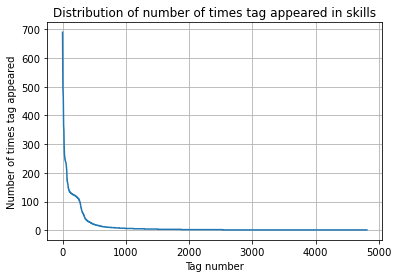

In [ ]:
plt.plot(tag_counts)
plt.title("Distribution of number of times tag appeared in skills")
plt.grid()
plt.xlabel("Tag number")
plt.ylabel("Number of times tag appeared")
plt.show()

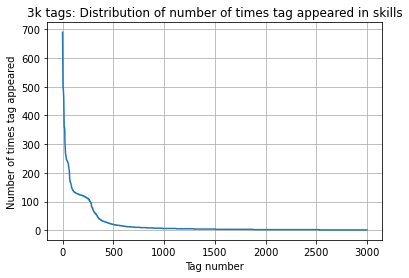

In [ ]:
plt.plot(tag_counts[0:3000])
plt.title('3k tags: Distribution of number of times tag appeared in skills')
plt.grid()
plt.xlabel("Tag number")
plt.ylabel("Number of times tag appeared")
plt.show()


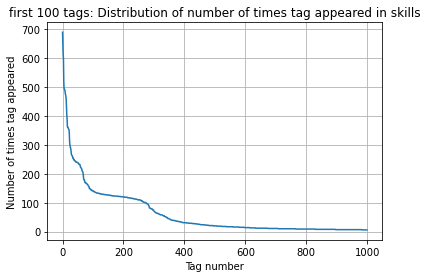

In [ ]:
plt.plot(tag_counts[0:1000])
plt.title('first 100 tags: Distribution of number of times tag appeared in skills')
plt.grid()
plt.xlabel("Tag number")
plt.ylabel("Number of times tag appeared")
plt.show()

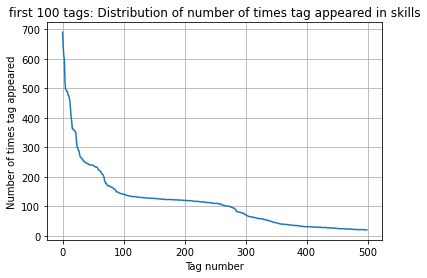

In [ ]:
plt.plot(tag_counts[0:500])
plt.title('first 100 tags: Distribution of number of times tag appeared in skills')
plt.grid()
plt.xlabel("Tag number")
plt.ylabel("Number of times tag appeared")
plt.show()

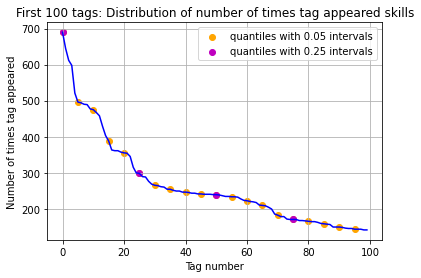

20 [690 496 475 388 355 298 265 254 246 241 239 233 222 209 182 170 165 158
 149 143]


In [ ]:
plt.plot(tag_counts[0:100], c='b')
plt.scatter(x=list(range(0,100,5)), y=tag_counts[0:100:5], c='orange', label="quantiles with 0.05 intervals")

# Quantiles with 0.25 difference
plt.scatter(x=list(range(0,100,25)), y=tag_counts[0:100:25], c='m', label = "quantiles with 0.25 intervals")

#for x,y in zip(list(range(0,100,25)), tag_counts[0:100:25]):
    #plt.annotate(s="({} , {})".format(x,y), xy=(x,y), xytext=(x-0.05, y+500))

plt.title('First 100 tags: Distribution of number of times tag appeared skills')
plt.grid()
plt.xlabel("Tag number")
plt.ylabel("Number of times tag appeared")
plt.legend()
plt.show()
print(len(tag_counts[0:100:5]), tag_counts[0:100:5])

In [ ]:
# Store tags greater than 10K in one list
lst_tags_gt_100 = tag_df[tag_df.Counts>100].Tags
#Print the length of the list
print ('{} Tags are used more than 100 times'.format(len(lst_tags_gt_100)))
# Store tags greater than 100K in one list
lst_tags_gt_1k = tag_df[tag_df.Counts>300].Tags
#Print the length of the list.
print ('{} Tags are used more than 300 times'.format(len(lst_tags_gt_1k)))

273 Tags are used more than 100 times
24 Tags are used more than 300 times


Observations:

There are total 273 tags which are used more than 100 times.
24 tags are used more than 300 times.
Most frequent tag (i.e. c#) is used 690 times.
Since some tags occur much more frequenctly than others, Micro-averaged F1-score is the appropriate metric for this probelm.

In [ ]:
# Storing the count of tag in each question in list 'tag_count'
tag_desc_count = tag_dtm.sum(axis=1).tolist()
# Converting list of lists into single list, we will get [[3], [4], [2], [2], [3]] and we are converting this to [3, 4, 2, 2, 3]
tag_desc_count=[int(j) for i in tag_desc_count for j in i]
print ('We have total {} datapoints.'.format(len(tag_desc_count)))

print(tag_desc_count[:5])

We have total 38720 datapoints.
[4, 1, 2, 2, 3]


In [ ]:
print( "Maximum number of tags per description: %d"%max(tag_desc_count))
print( "Minimum number of tags per description: %d"%min(tag_desc_count))
print( "Avg. number of tags per description: %f"% ((sum(tag_desc_count)*1.0)/len(tag_desc_count)))

Maximum number of tags per description: 16
Minimum number of tags per description: 1
Avg. number of tags per description: 2.653151


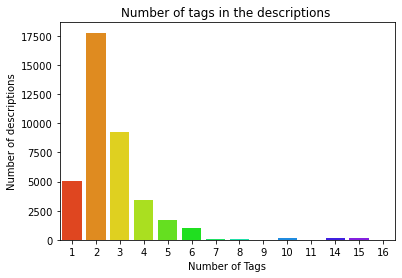

In [ ]:
sns.countplot(tag_desc_count, palette='gist_rainbow')
plt.title("Number of tags in the descriptions ")
plt.xlabel("Number of Tags")
plt.ylabel("Number of descriptions")
plt.show()

Observations:

Maximum number of tags per question: 16
Minimum number of tags per question: 1
Avg. number of tags per question: 2.56
Most of the questions are having 1,2 or 3 tags

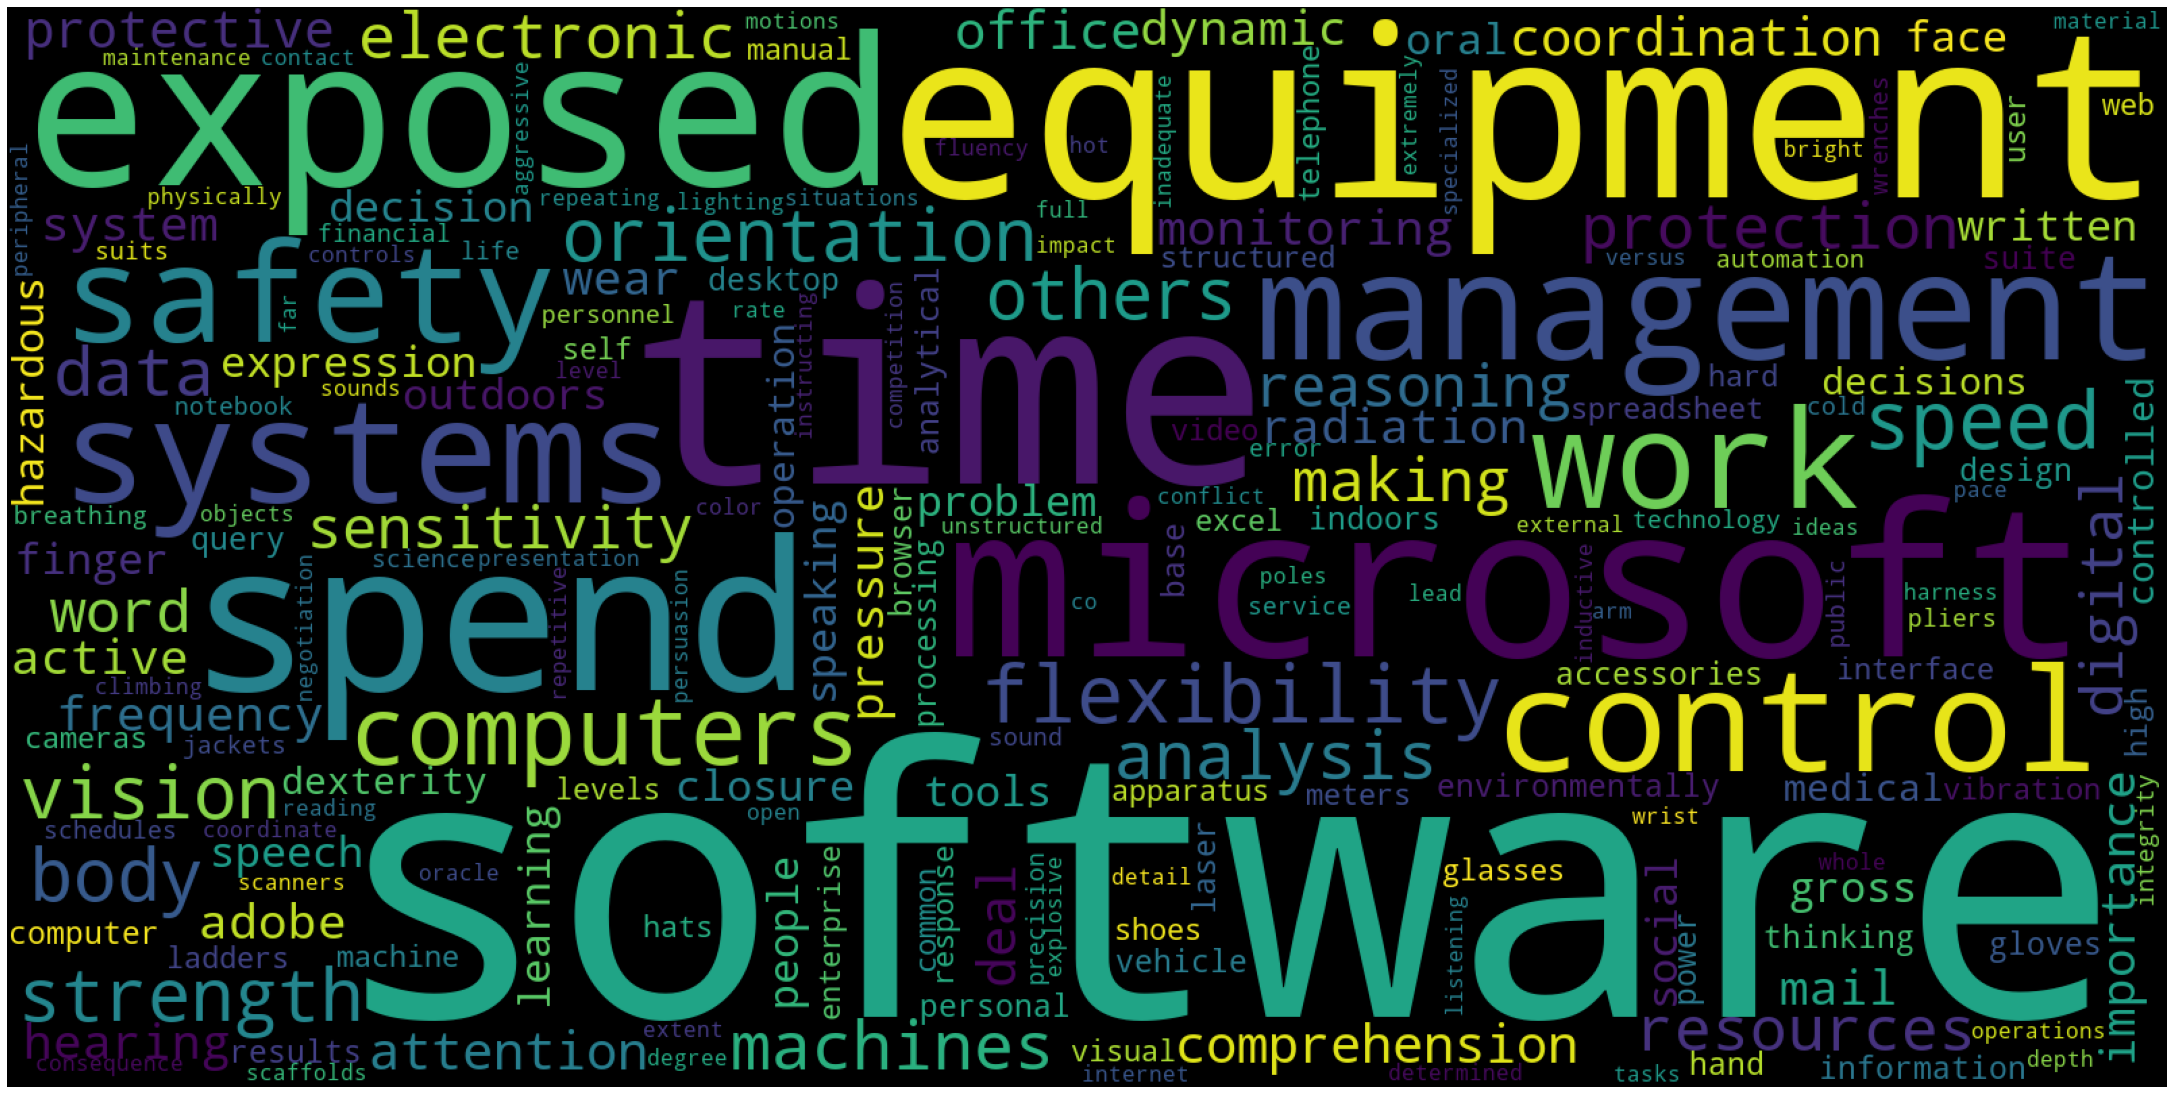

Time taken to run this cell : 0:00:04.141610


In [ ]:
# Plotting word cloud
start = datetime.now()

# Lets first convert the 'result' dictionary to 'list of tuples'
tup = dict(result.items())
# Initializing WordCloud using frequencies of tags.
wordcloud = WordCloud(    
    background_color='black', width=1600, height=800,
).generate_from_frequencies(tup)

fig = plt.figure(figsize=(30,20))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
fig.savefig("tag.png")
plt.show()
print("Time taken to run this cell :", datetime.now() - start)

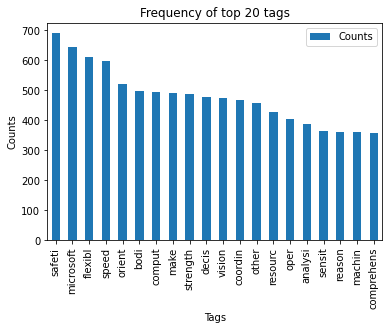

In [ ]:
i = np.arange(20)
tag_df_sorted.head(20).plot(kind='bar')
plt.title('Frequency of top 20 tags')
plt.xticks(i, tag_df_sorted.head(20)["Tags"])
plt.xlabel('Tags')
plt.ylabel('Counts')
plt.show()

In [ ]:
# binary='true' will give a binary vectorizer
vectorizer = CountVectorizer(tokenizer = lambda x: x.split(), binary='true')
multilabel_y = vectorizer.fit_transform(df['tags'])

In [ ]:
def tags_to_choose(n):
    t = multilabel_y.sum(axis=0).tolist()[0]
    sorted_tags_i = sorted(range(len(t)), key=lambda i: t[i], reverse=True)
    multilabel_yn = multilabel_y[:,sorted_tags_i[:n]]
    return multilabel_yn

def questions_explained_fn(n):
    multilabel_yn = tags_to_choose(n)
    x = multilabel_yn.sum(axis=1)
    return (np.count_nonzero(x==0))

In [ ]:
questions_explained = []
total_tags = multilabel_y.shape[1]
total_qs = df.shape[0]
for i in range(500, total_tags, 100):
    questions_explained.append(np.round(((total_qs-questions_explained_fn(i))/total_qs)*100,3))

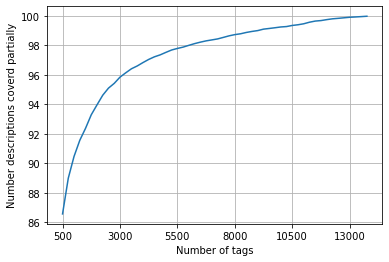

With  5500 tags we are covering  99.91 % of descriptions


In [ ]:
fig, ax = plt.subplots()
ax.plot(questions_explained)
xlabel = list(500 + np.array(range(-50,450,50))*50)
ax.set_xticklabels(xlabel)
plt.xlabel("Number of tags")
plt.ylabel("Number descriptions coverd partially")
plt.grid()
plt.show()

# You can choose any number of tags based on your computing power, minimun is 50(it covers 90% of the tags)
print("With ", 5500, "tags we are covering ", questions_explained[50], "% of descriptions")

In [ ]:
multilabel_yx = tags_to_choose(5500)
print("Number of descriptions that are not covered:", questions_explained_fn(5500),"out of", total_qs)

Number of descriptions that are not covered: 35 out of 38720


In [ ]:
# We consider top 15% tags which covers  99% of the questions
print("Number of tags in sample:", multilabel_y.shape[1])
print("Number of tags taken:", multilabel_yx.shape[1],"(",(multilabel_yx.shape[1]/multilabel_y.shape[1])*100,"%)")

Number of tags in sample: 5860
Number of tags taken: 5500 ( 93.85665529010238 %)


In [ ]:
total_size = df.shape[0]
train_size = int(0.80*total_size)

x_train = df.head(train_size)
x_test = df.tail(total_size - train_size)

y_train = multilabel_yx[0:train_size, : ]
y_test = multilabel_yx[train_size:total_size, : ]

In [ ]:
print("Number of data points in train data:", y_train.shape)
print("Number of data points in test data:", y_test.shape)

Number of data points in train data: (30976, 5500)
Number of data points in test data: (7744, 5500)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
# In kaggle kernel, TF-IDF is not working with max_features = 200000 & ngram_range = (1, 3) 
# due to memory constraints. Hence, setting the max_features = 100000, ngram_range = (1, 2)
start = datetime.now()
vectorizer = TfidfVectorizer(
    min_df = 0.00009, max_features = 10000, smooth_idf = True, norm = "l2",
    tokenizer = lambda x: x.split(), sublinear_tf = False, ngram_range = (1,2)
)
x_train_multilabel = vectorizer.fit_transform(x_train['description'])
x_test_multilabel = vectorizer.transform(x_test['description'])
print("Time taken to run this cell :", datetime.now() - start)

Time taken to run this cell : 0:00:00.933999


In [ ]:
print("Dimensions of train data X:", x_train_multilabel.shape, "Y :",y_train.shape)
print("Dimensions of test data X:", x_test_multilabel.shape, "Y:",y_test.shape)

Dimensions of train data X: (30976, 10000) Y : (30976, 5500)
Dimensions of test data X: (7744, 10000) Y: (7744, 5500)


We can apply any classifier algorithms 